A new family of CNN that not only has good accuracy, but is lighter and works faster on mobile devices.

Created by Google, MobileNet's key feature is that it uses a different "sandwich" form of convolution block. Instead of the usual (CONV, BATCH_NORM,RELU), it splits 3x3 convolutions up into a 3x3 depthwise convolution, followed by a 1x1 Pointwise CONV.​ They call this block a depthwise separable convolution.

This factorization reduces the computation and the model size:

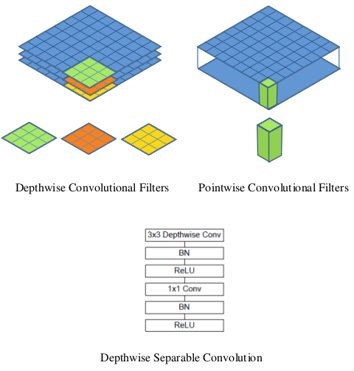

In [1]:
from IPython.display import Image
Image(filename='./images/mobile.png') 

#### Depthwise separable convolution
This new convolution block (tf.layers.separable_conv2d) consists of two main parts: a depthwise convolution layer, followed by a 1x1 pointwise convolution layer. This block differs from the normal convolution in a couple of ways:

In the normal convolution layer, each filter F will be applied to all channels on the input channel at the same time (F is applied to each channel and then summed)
This new convolution F is applied on each channel separately, and the results get concatenated to some intermediate tensor (how much is controlled by the Depth Multiplier, DM parameter)
The depthwise convolution is extremely efficient relative to standard convolution. However, it only filters input channels, and it does not combine them to create new features.​

Now, the depthwise output tensor will be mapped to some desired output channel depth using a 1x1 conv layer that will do the mixing between channels that normally occurs in the standard convolution layers. The difference is that the DM parameter can be used to throw away some information. Again, the 1x1 conv has been used just to adapt volume sizes.​

### Control parameters
MobileNets uses two hyperparameters to help control the trade-off between accuracy and speed, allowing for a network that is suitable for any device you want to target. The two hyperparameters are as follows:​

Width Multiplier: Controls the Depthwise CONVs accuracy​ by uniformly reducing the number filters used throughout the network
Resolution Multiplier: Simply scales down the input image​ to different sizes

#### More about MobileNets
MobileNets has some of the best accuracy, speed, and parameter ratios for any neural network design.

However, currently there is no good (fast) implementation of depthwise convolutions for running on a GPU; as a result, training will likely be slower than using a normal convolution operation. However, where this network really shines at the moment is in small CPU designs, where the increased efficiency is more visible.